In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [20]:
x, y = make_blobs(random_state=7)

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [22]:
kmeans.predict(x)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0])

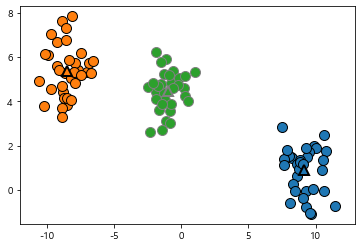

In [23]:
mglearn.discrete_scatter(x[:,0],x[:,1], kmeans.labels_, markers='o')     # kmeans.labels_ : 예측값
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)   # 중심점

# x, y = make_blobs(random_state=1) 에서 random_state를 조절하면 그래프 점들의 군집정도가 달라짐

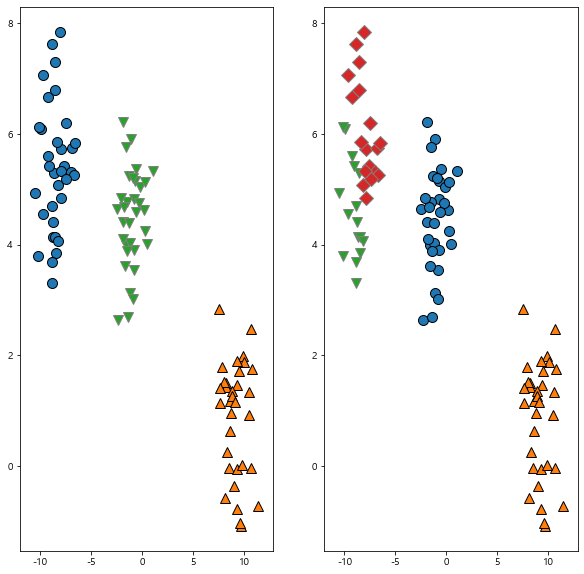

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
a = kmeans.labels_
mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[0])

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a = kmeans.labels_
mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[1])

plt.show()

kmeans 군집분석 실패 사례

In [27]:
x, y = make_blobs(n_samples=200, cluster_std=[1.0,1.5,2.5], random_state=77)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
pred = kmeans.predict(x)

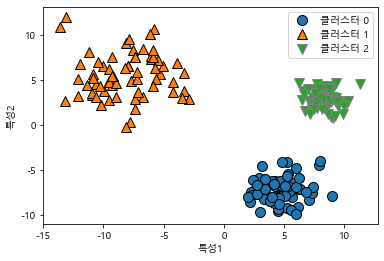

In [29]:
mglearn.discrete_scatter(x[:,0], x[:,1], pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.xlabel('특성1')
plt.ylabel('특성2')
plt.show()

In [30]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# data가 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x = np.dot(x, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

kmeans는 한줄로 data를 표현할 때 군집 구분이 잘 안됨

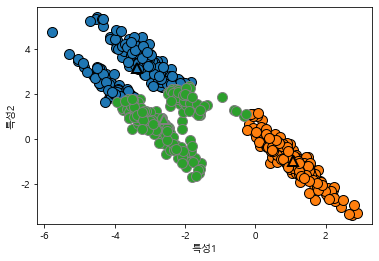

In [32]:
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)

plt.xlabel('특성1')
plt.ylabel('특성2')
plt.show()

In [34]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

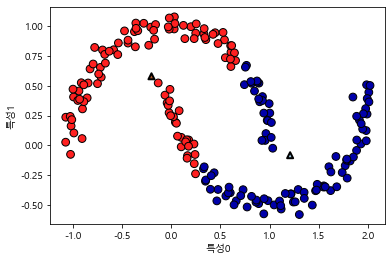

In [36]:
plt.scatter(x[:,0], x[:,1], c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired', edgecolors='k')

plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

kmeans 비선형 군집 잘 못 잡음